In [63]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
print('seaborn version :',sns.__version__)

seaborn version : 0.11.2


Load Data Life Expectancy

In [65]:
led = pd.read_csv('/content/sample_data/Life Expectancy Data.csv')
led.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [66]:
led.shape

(2938, 22)

#Mengganti nama

In [67]:
led.rename(columns={'thinness  1-19 years':'thinness_10-19_years'}) #ini kok gamauu

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Mengecek Missing Value dan Duplicates

In [68]:
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [69]:
led.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [70]:
missing_value = led.isna().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(led))*100,2)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['percentage']>0]
missing_value

,feature,missing_value,percentage
0,Population,652,22.19
1,Hepatitis B,553,18.82
2,GDP,448,15.25
3,Total expenditure,226,7.69
4,Alcohol,194,6.60
5,Income composition of resources,167,5.68
6,Schooling,163,5.55
7,thinness 5-9 years,34,1.16
8,thinness 1-19 years,34,1.16
9,BMI,34,1.16


Text(0.5, 0, 'Feature')

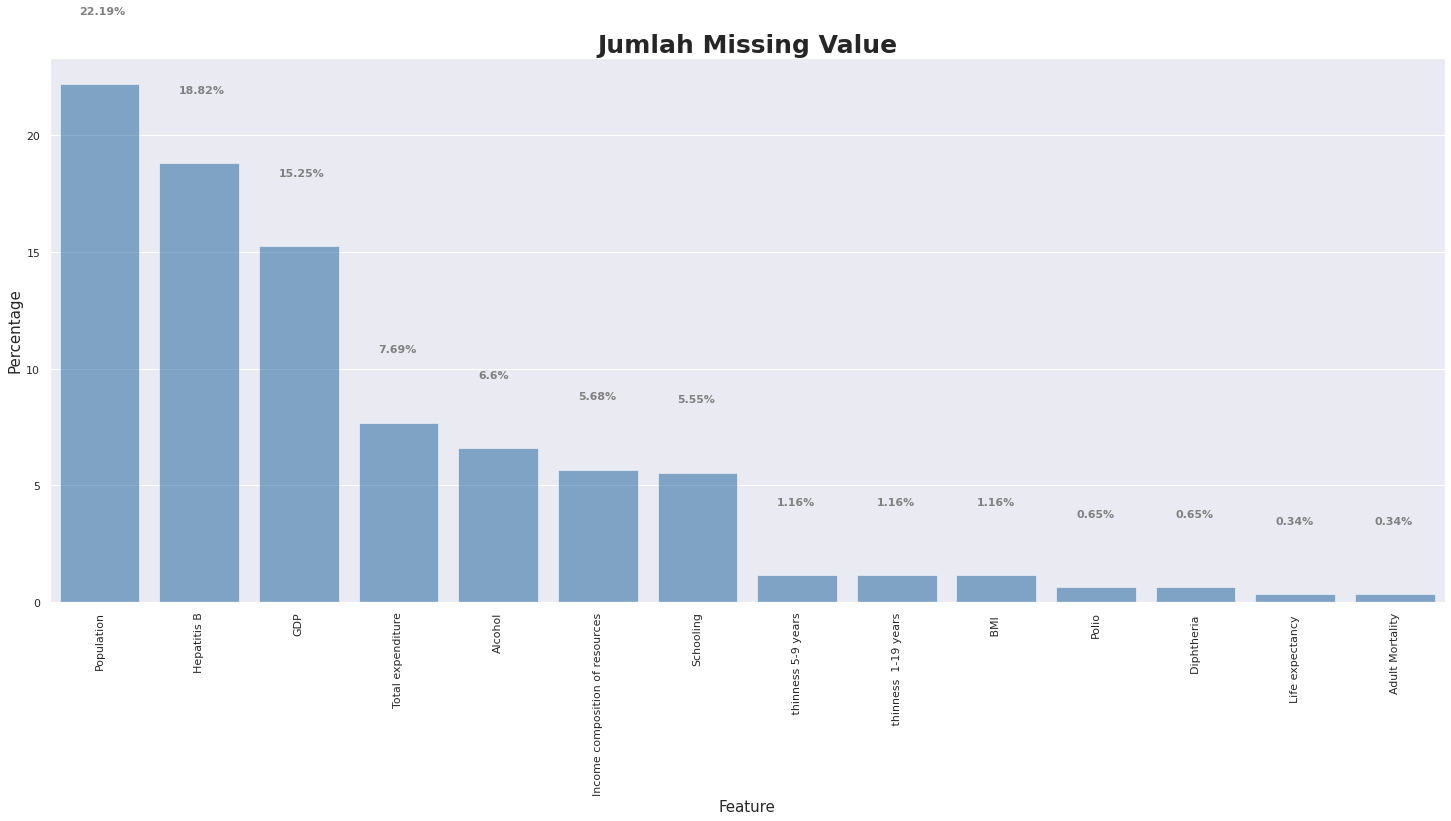

In [71]:
sns.set()
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(25,10))

g = sns.barplot (x ='feature',y='percentage',data=missing_value,ax=ax, color = '#005faf', alpha=0.5)

y = missing_value['percentage']
x = np.arange(len(missing_value['feature']))

for i,v in enumerate(y):
  ax.text(x[i] - 0.2, v+3, str(v) + '%', fontsize =11, color='gray', fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

ax.set_title ('Jumlah Missing Value', fontsize = 25, fontweight='bold')
ax.set_ylabel ('Percentage', fontsize = 15)
ax.set_xlabel ('Feature', fontsize = 15)

In [72]:
led.duplicated().sum()

0

#Handling Missing Value

In [73]:
led = led.fillna(led.median())

In [74]:
led.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [75]:
led.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#Handling Outlier

In [85]:
led_1 = led.drop(['Year', 'Status', 'Country'], axis=1)
led_1.shape

(2938, 19)

<function matplotlib.pyplot.show>

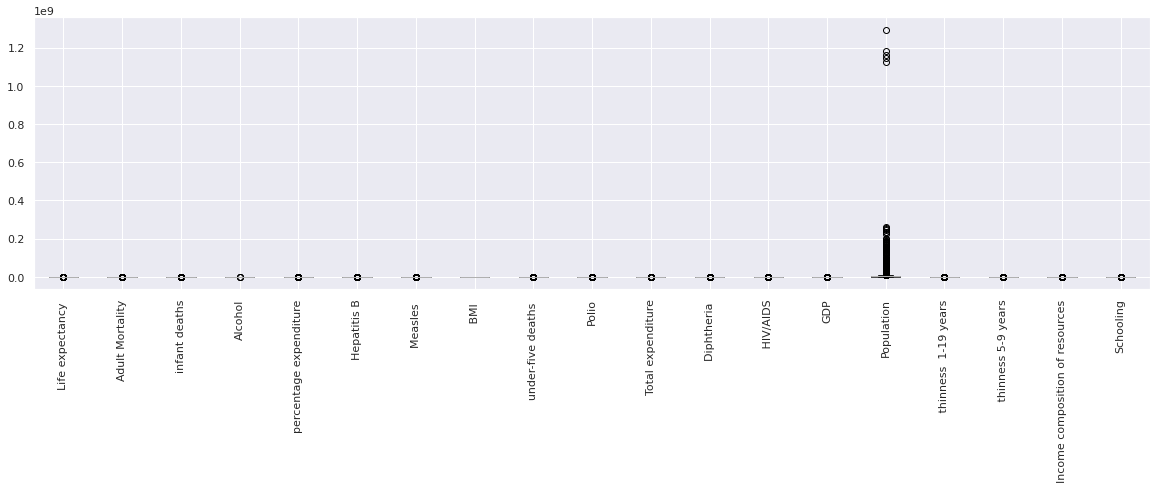

In [86]:
plt.figure(figsize= (20,5))
led_1.boxplot()
plt.xticks(rotation=90)
plt.show

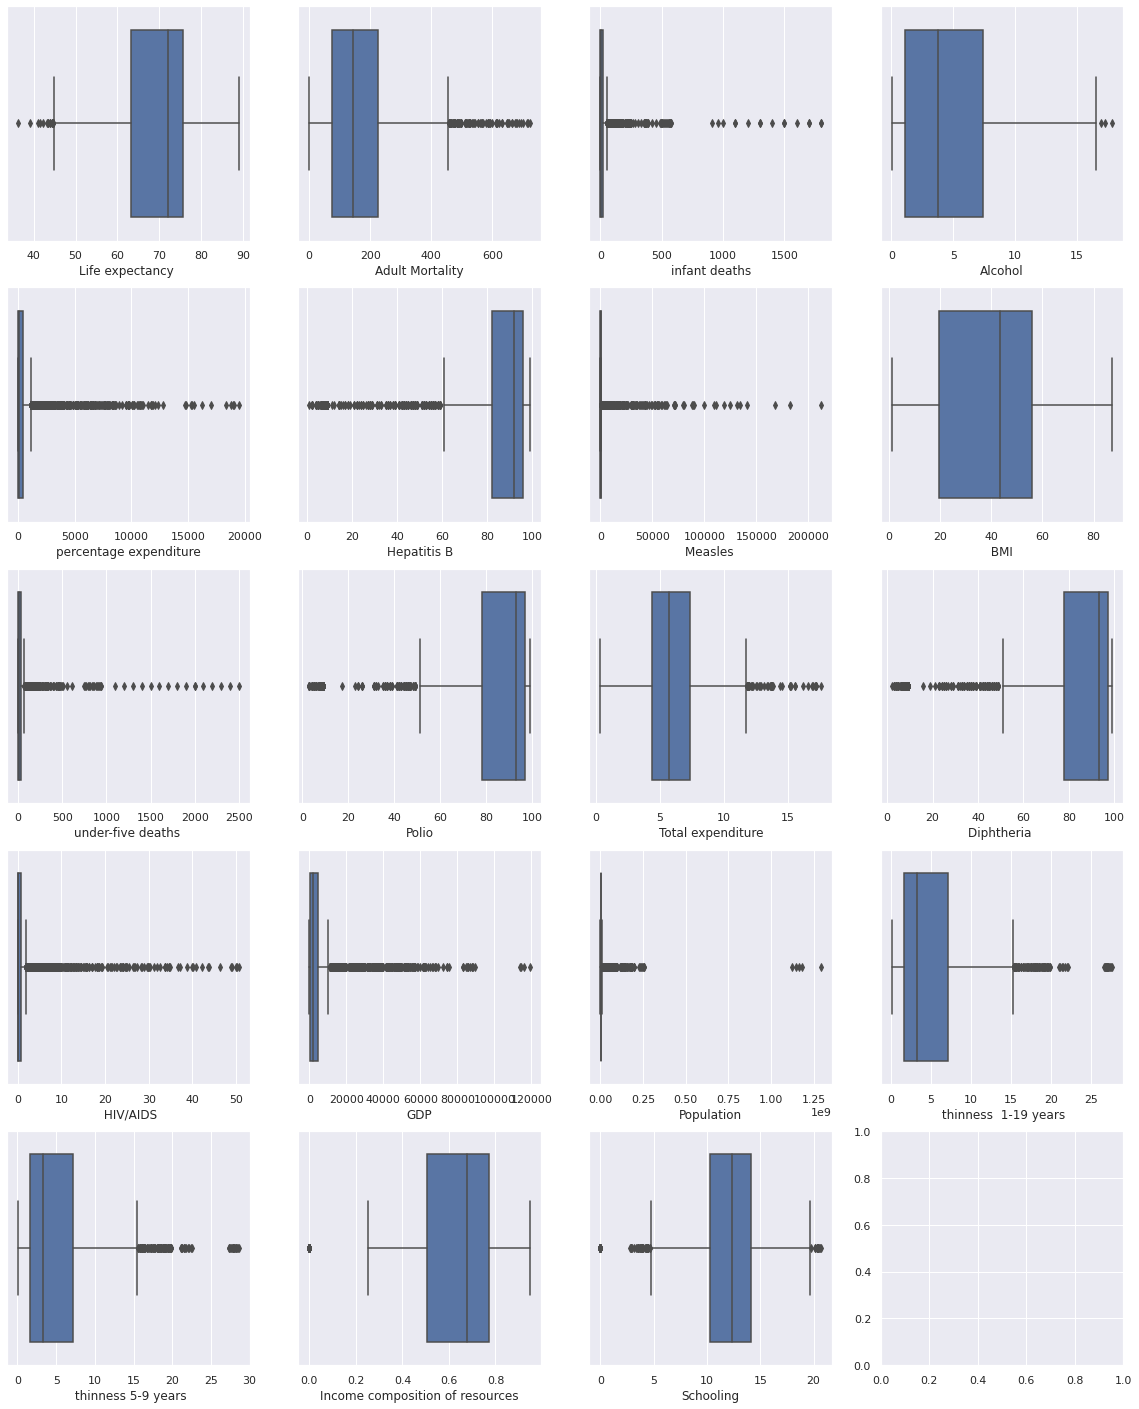

In [87]:
fig,ax = plt.subplots(nrows=5, ncols=4, figsize=(20,25))

for variable, subplot in zip(led_1.columns, ax.flatten()) :
  sns.boxplot(led_1[variable], ax = subplot)

Untuk handling outlier data ini, menggunakan log transform terlebih dahulu agar tidak banyak membuang outlier nantinya.

In [88]:
led_1 = np.log(led_1 + 1)
led_1.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,4.189655,5.575949,4.143135,0.00995,4.280542,4.189655,7.051856,3.000720,4.430817,1.945910,2.214846,4.189655,0.09531,6.372055,17.334091,2.901422,2.906901,0.391366,2.406945
1,4.109233,5.605802,4.174387,0.00995,4.311116,4.143135,6.200509,2.975530,4.465908,4.077537,2.217027,4.143135,0.09531,6.419501,12.699497,2.917771,2.917771,0.389336,2.397895
2,4.109233,5.594711,4.204693,0.00995,4.307023,4.174387,6.066108,2.949688,4.499810,4.143135,2.211566,4.174387,0.09531,6.450067,17.272826,2.928524,2.928524,0.385262,2.388763
3,4.102643,5.609472,4.248495,0.00995,4.371777,4.219508,7.933080,2.923162,4.543295,4.219508,2.253395,4.219508,0.09531,6.508708,15.123021,2.939162,2.944439,0.380489,2.379546
4,4.097672,5.620401,4.276666,0.00995,2.091507,4.234107,8.011023,2.901422,4.584967,4.234107,2.182675,4.234107,0.09531,4.167242,14.906964,2.954910,2.954910,0.374318,2.351375


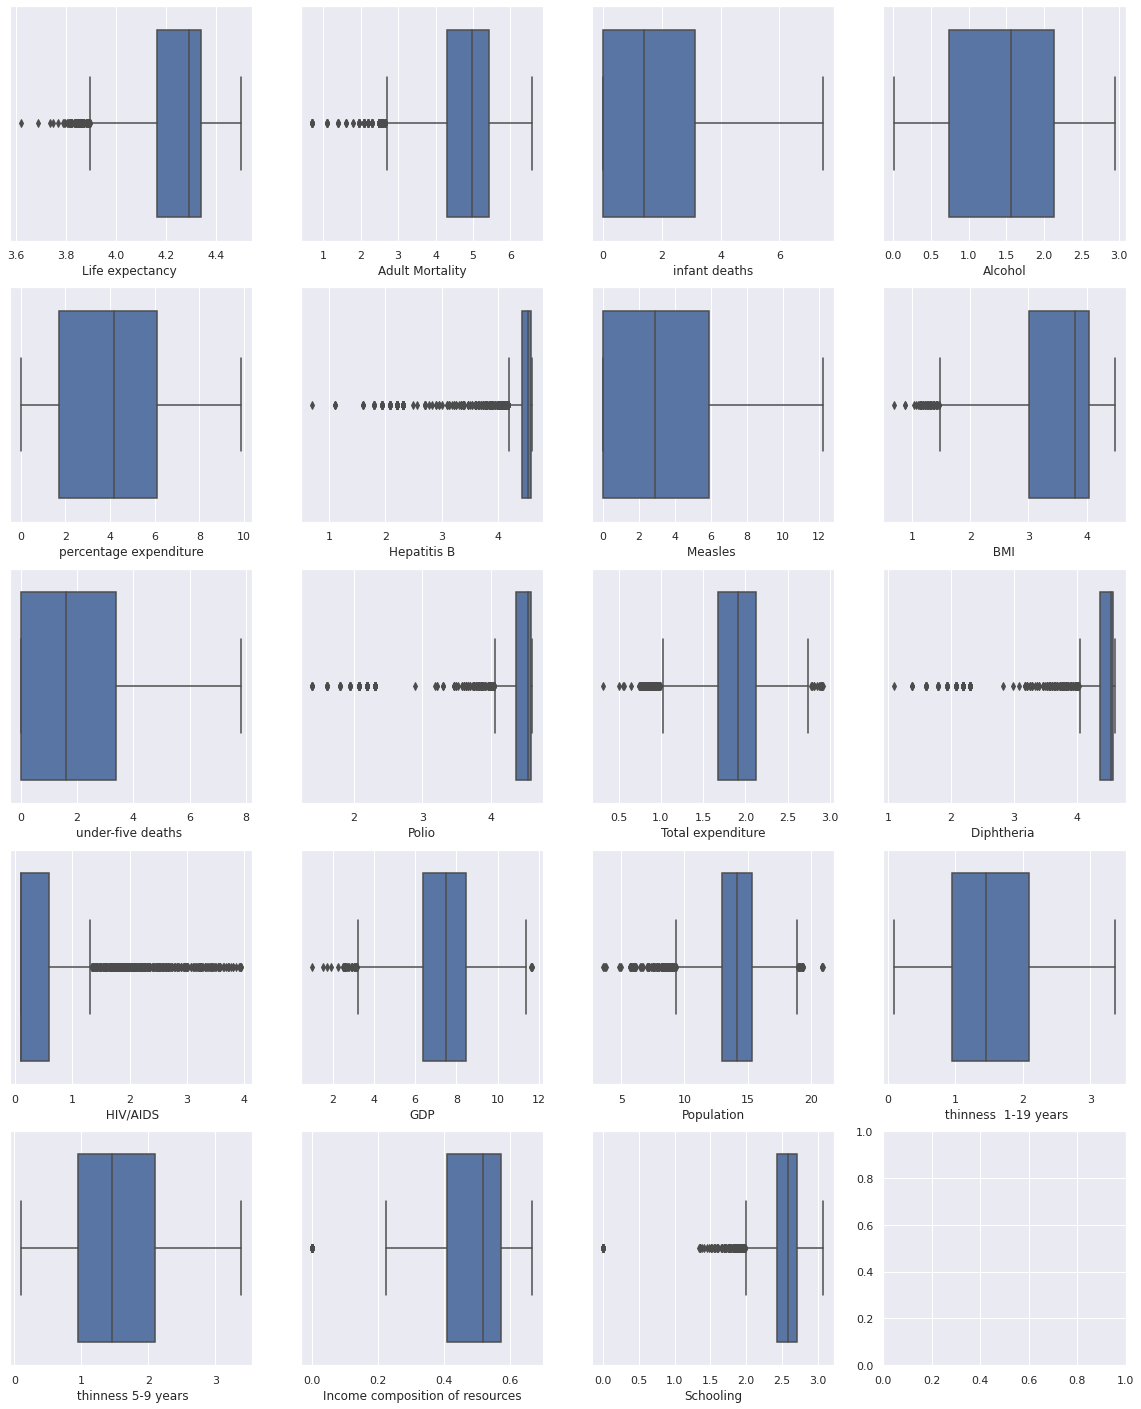

In [89]:
fig,ax = plt.subplots(nrows=5, ncols=4, figsize=(20,25))

for variable, subplot in zip(led_1.columns, ax.flatten()) :
  sns.boxplot(led_1[variable], ax = subplot)

In [90]:
led_1.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,4.241866,4.729214,1.768585,1.406197,3.986284,4.332895,3.357053,3.466329,1.940084,4.325680,1.870661,4.320685,0.510334,7.471471,13.948246,1.510794,1.509411,0.479677,2.518563
std,0.144557,1.035045,1.663020,0.842420,2.729832,0.580923,3.259046,0.749572,1.781790,0.587782,0.372877,0.592871,0.765864,1.723041,2.348565,0.708459,0.719422,0.140487,0.361391
min,3.618993,0.693147,0.000000,0.009950,0.000000,0.693147,0.000000,0.693147,0.000000,1.386294,0.314811,1.098612,0.095310,0.986320,3.555348,0.095310,0.095310,0.000000,0.000000
25%,4.162003,4.317488,0.000000,0.738357,1.737885,4.418841,0.000000,3.015535,0.000000,4.369448,1.680828,4.369448,0.095310,6.365586,12.945431,0.955511,0.955511,0.408294,2.424803
50%,4.291828,4.976734,1.386294,1.559197,4.188334,4.532599,2.890372,3.795489,1.609438,4.543295,1.910283,4.543295,0.095310,7.477575,14.142324,1.458615,1.458615,0.517006,2.587764
75%,4.338597,5.429346,3.135494,2.127041,6.092517,4.574711,5.889564,4.044804,3.367296,4.584967,2.119863,4.584967,0.587787,8.472280,15.338163,2.091864,2.104134,0.572109,2.714695
max,4.499810,6.584791,7.496097,2.937573,9.877190,4.605170,12.265209,4.480740,7.824446,4.605170,2.923162,4.605170,3.943522,11.688338,20.980895,3.356897,3.387774,0.666803,3.077312


In [25]:
cate = ['Country', 'Status']
numb = ['Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'percentage expenditure', 'Hepatitis B', 'Measles', 'thinness 5-9 years', 
        'thinness 1-19 years', 'Population', 'Life expectancy', 'HIV/AIDS', 'under-five deaths', 'Diphtheria', 'Polio', 
        'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']

In [26]:
led[cate].describe()

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426
